In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
encodings = ['utf-8', 'latin1', 'IS)-8859-1', 'cp1252' ]
file_path = 'spam.csv'
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"file successfully read with encoding: {encoding}")
        break 
    except UnicodeDecodeError:
        print(f"Failed to read with encodings: {encoding}")
        continue
if 'df' in locals():
    print('csv file has been successfully loaded.')
else:
    print('All encoding attempts failed. Unable to read the CSV file')

Failed to read with encodings: utf-8
file successfully read with encoding: latin1
csv file has been successfully loaded.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
399,ham,Hmmm...k...but i want to change the field quic...,NaN,NaN,NaN
5538,ham,I can't believe how attached I am to seeing yo...,NaN,NaN,NaN
1165,ham,"Haha yeah I see that now, be there in a sec",NaN,NaN,NaN
3116,ham,Now am free call me pa.,NaN,NaN,NaN
5260,ham,If anyone calls for a treadmill say you'll buy...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [7]:
df.sample(5)

,v1,v2
5086,ham,Omg if its not one thing its another. My cat h...
4078,ham,O i played smash bros &lt;#&gt; religiously.
3201,ham,Okay lor... Wah... like that def they wont let...
4086,spam,PRIVATE! Your 2003 Account Statement for 07973...
787,spam,Ever thought about living a good life with a p...


In [8]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
1735,ham,Why tired what special there you had
2715,ham,Cool. I am &lt;#&gt; inches long. hope you l...
2181,ham,Ok.
3497,ham,You said to me before i went back to bed that ...
1403,ham,cool. We will have fun practicing making babies!


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']= encoder.fit_transform(df['target'])

In [10]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [11]:
# checking missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

403

In [13]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

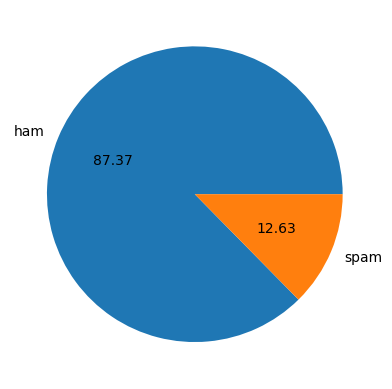

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

#### ham messages is more than spam message

In [18]:
# Data is imbalanced

In [19]:
import nltk

In [20]:
df['num_characters']=df['text'].apply(len)

In [21]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head(3)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [23]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

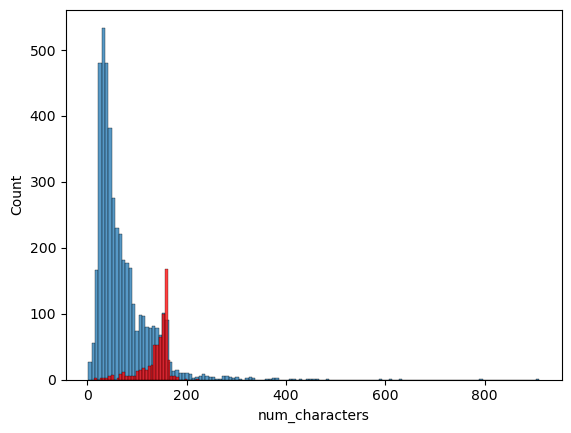

In [27]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

Above histogram shows that most of the spam message having more num_characters than ham message

<Axes: xlabel='num_words', ylabel='Count'>

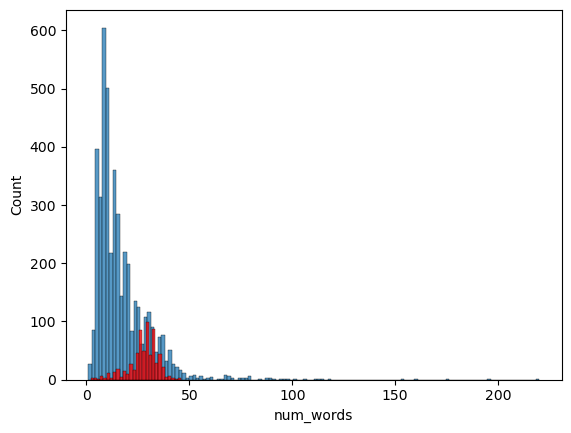

In [28]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

Above histogram shows that most of the spam message having more num_words than ham message

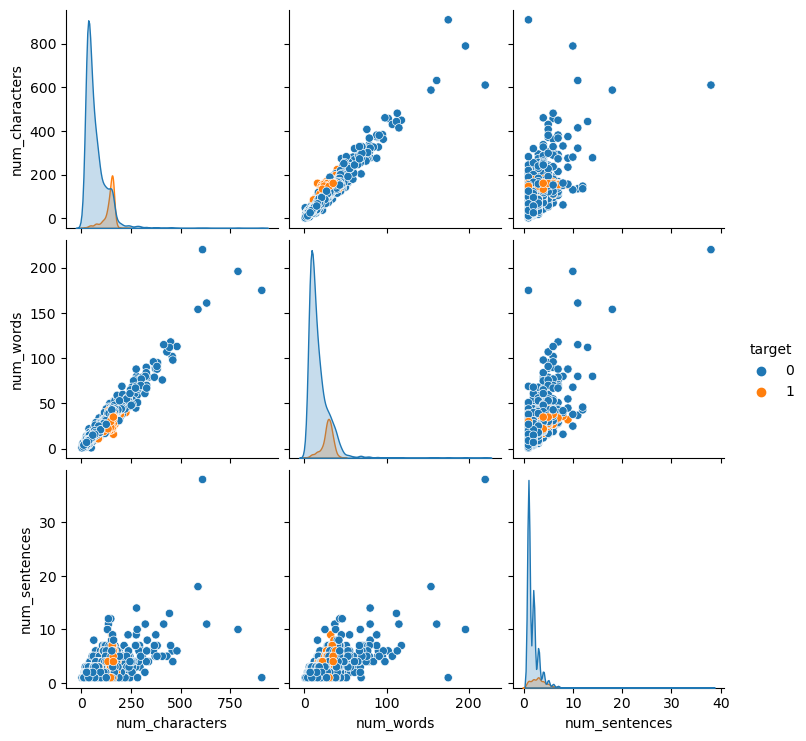

In [29]:
sns.pairplot(df, hue='target')

In [30]:
df.corr(numeric_only=all)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


# Data Preprocessing

In [31]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
      
    return " ".join(y)

In [32]:
df['transformed_text']=df['text'].apply(transform_text)

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height =800, min_font_size=10, background_color='white')

In [35]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

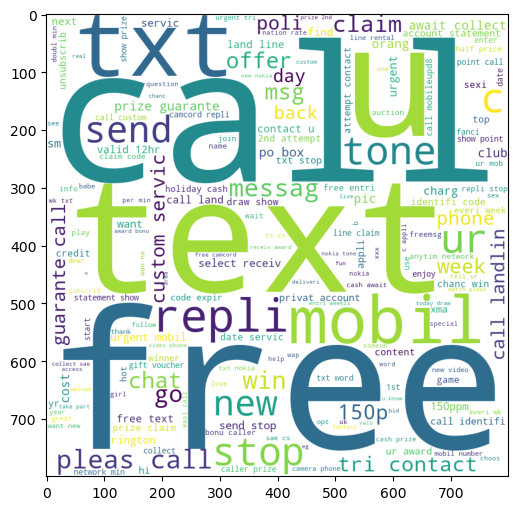

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [37]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

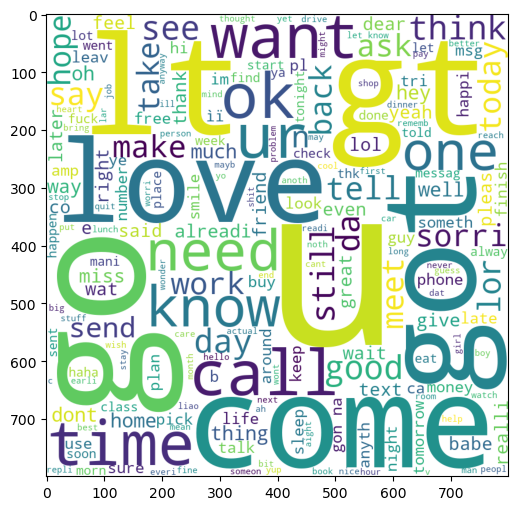

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
len(spam_corpus)

9939

In [41]:
import pandas as pd
from collections import Counter
most_common_words = Counter(spam_corpus).most_common(30)

In [42]:
data= pd.DataFrame(most_common_words, columns=['Word', 'Count'])

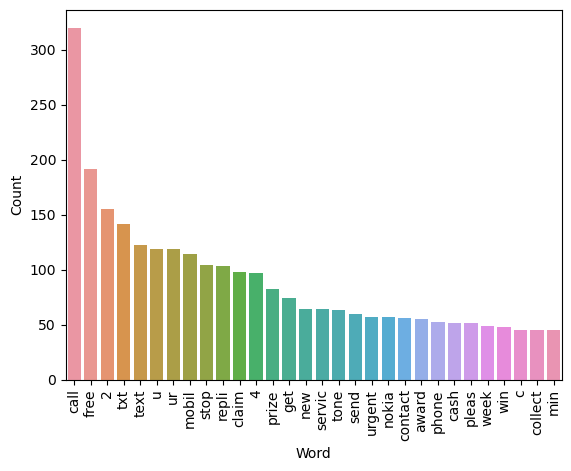

In [43]:
sns.barplot(x='Word', y='Count', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)        

35404

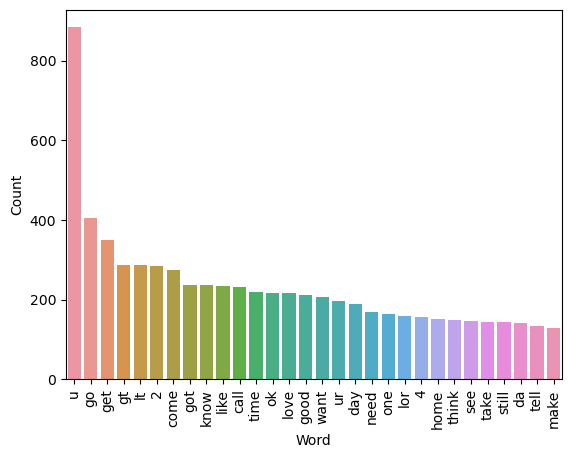

In [45]:
import pandas as pd
from collections import Counter
most_common_words = Counter(ham_corpus).most_common(30)
data= pd.DataFrame(most_common_words, columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=data)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer()
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
x.shape

(5169, 6708)

In [48]:
y= df['target'].values

In [49]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
naive1 = GaussianNB()
naive2 = MultinomialNB()
naive3 = BernoulliNB()

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
naive1.fit(x_train, y_train)
y_pred1 = naive1.predict(x_test)

In [53]:
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(recall_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8762088974854932
0.5231481481481481
0.8188405797101449
[[793 103]
 [ 25 113]]


In [54]:
naive2.fit(x_train, y_train)
y_pred2 = naive2.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(recall_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9593810444874274
1.0
0.6956521739130435
[[896   0]
 [ 42  96]]


In [55]:
naive3.fit(x_train, y_train)
y_pred3= naive3.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(recall_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9700193423597679
0.9734513274336283
0.7971014492753623
[[893   3]
 [ 28 110]]


#Multinomial naive bayes gives good precision

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [57]:
log= LogisticRegression()
nbc= MultinomialNB()
dtc= DecisionTreeClassifier()
Rmf= RandomForestClassifier(n_estimators=50, random_state=42)
adc= AdaBoostClassifier(n_estimators=50, random_state=42)
Bgc= BaggingClassifier(n_estimators=50, random_state=42)
xgb= XGBClassifier(n_estimators=50, random_state=42)

In [58]:
clfs = {
    'logistic': log,
    'naive': nbc,
    'dtree': dtc,
    'Rmforest': Rmf,
    'adboost': adc,
    'Bagging': Bgc,
    'xgclassifier': xgb
}

In [59]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [60]:
accuracy, precision=train_classifier(log, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9477756286266924 0.9883720930232558


In [61]:
accuracy, precision=train_classifier(nbc, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9593810444874274 1.0


In [62]:
accuracy, precision=train_classifier(dtc, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9555125725338491 0.8382352941176471


In [63]:
accuracy, precision=train_classifier(Rmf, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9729206963249516 0.9910714285714286


In [64]:
accuracy, precision=train_classifier(adc, x_train, y_train, x_test, y_test)
print(accuracy, precision)

C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9613152804642167 0.9454545454545454


In [65]:
accuracy, precision=train_classifier(Bgc, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9584139264990329 0.8571428571428571


In [66]:
accuracy, precision=train_classifier(xgb, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9729206963249516 0.9435483870967742


In [67]:
data={
    'Model' : ['logistic','naive','dtree','Rmforest','adboost','Bagging','xgclassifier'],
'Accuracy' : [0.9477,0.9593,0.9516,0.9729,0.9613,0.9584,0.9729],
'Precision' : [0.9883,1.0,0.8188,0.9910,0.9454,0.8571,0.9435]
     }
Performance_model= pd.DataFrame(data, columns=['Model','Accuracy','Precision'])

In [68]:
Performance_model

,Model,Accuracy,Precision
0,logistic,0.9477,0.9883
1,naive,0.9593,1.0000
2,dtree,0.9516,0.8188
3,Rmforest,0.9729,0.9910
4,adboost,0.9613,0.9454
5,Bagging,0.9584,0.8571
6,xgclassifier,0.9729,0.9435


#### Random forest and naive bayes model gives high accuracy as well as precision

# Improving the model

In [69]:
tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [72]:
log= LogisticRegression()
nbc= MultinomialNB()
dtc= DecisionTreeClassifier()
Rmf= RandomForestClassifier(n_estimators=50, random_state=42)
adc= AdaBoostClassifier(n_estimators=50, random_state=42)
Bgc= BaggingClassifier(n_estimators=50, random_state=42)
xgb= XGBClassifier(n_estimators=50, random_state=42)

In [73]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [74]:
accuracy, precision=train_classifier(log, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9564796905222437 0.979381443298969


In [75]:
accuracy, precision=train_classifier(nbc, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9709864603481625 1.0


In [76]:
accuracy, precision=train_classifier(dtc, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9458413926499033 0.7847222222222222


In [77]:
accuracy, precision=train_classifier(Rmf, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9748549323017408 0.9912280701754386


In [78]:
accuracy, precision=train_classifier(adc, x_train, y_train, x_test, y_test)
print(accuracy, precision)

C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9613152804642167 0.9375


In [79]:
accuracy, precision=train_classifier(Bgc, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.960348162475822 0.8592592592592593


In [80]:
accuracy, precision=train_classifier(xgb, x_train, y_train, x_test, y_test)
print(accuracy, precision)

0.9671179883945842 0.9262295081967213


In [81]:
data1={
'Accuracy_max_feature3000' : [0.9564,0.9709,0.9458,0.9748,0.9613,0.9603,0.9671],
'Precision_max_feature3000' : [0.9793,1.0,0.8153,0.9912,0.9375,0.8592,0.9262]
     }
Performance_model1= pd.DataFrame(data1)

In [82]:
pd.concat([Performance_model, Performance_model1], axis=1)

,Model,Accuracy,Precision,Accuracy_max_feature3000,Precision_max_feature3000
0,logistic,0.9477,0.9883,0.9564,0.9793
1,naive,0.9593,1.0000,0.9709,1.0000
2,dtree,0.9516,0.8188,0.9458,0.8153
3,Rmforest,0.9729,0.9910,0.9748,0.9912
4,adboost,0.9613,0.9454,0.9613,0.9375
5,Bagging,0.9584,0.8571,0.9603,0.8592
6,xgclassifier,0.9729,0.9435,0.9671,0.9262


#### Naive bayes model gives good performance 

In [83]:
# Save the trained Tf- IDF vectorizer and Naive Bayes model to files
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(nbc, open('model.pkl', 'wb'))